In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import pandas as pd
synthetic_2024 = pd.read_csv('/content/drive/My Drive/synthetic_data_2024.csv')
classification_2024 = pd.read_csv('/content/drive/My Drive/classification_2024_data.csv')
data_2012 = pd.read_csv('/content/drive/My Drive/data_2012.csv')
data_2014 = pd.read_csv('/content/drive/My Drive/data_2014.csv')
data_2016 = pd.read_csv('/content/drive/My Drive/data_2016.csv')


CR2 is gender, I decide to use the bar graph to show the difference among years 2012, 2014, 2016, 2024.

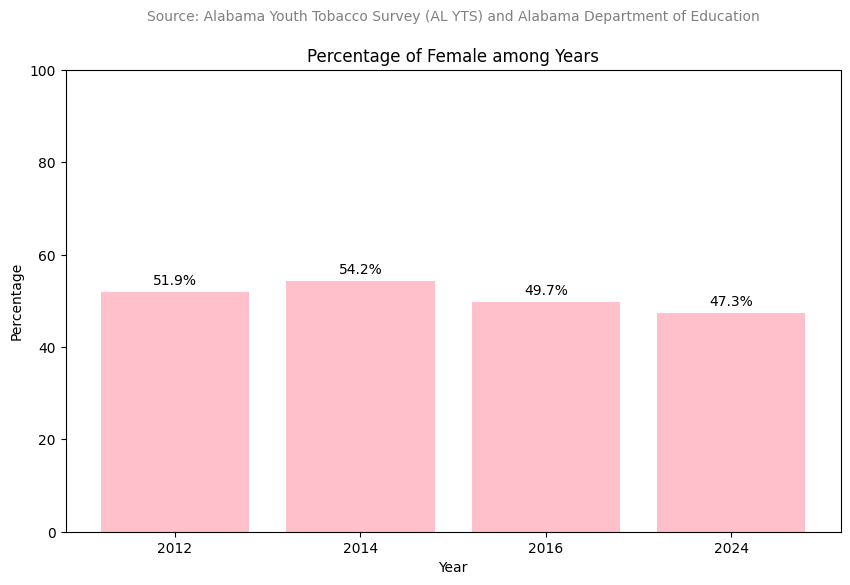

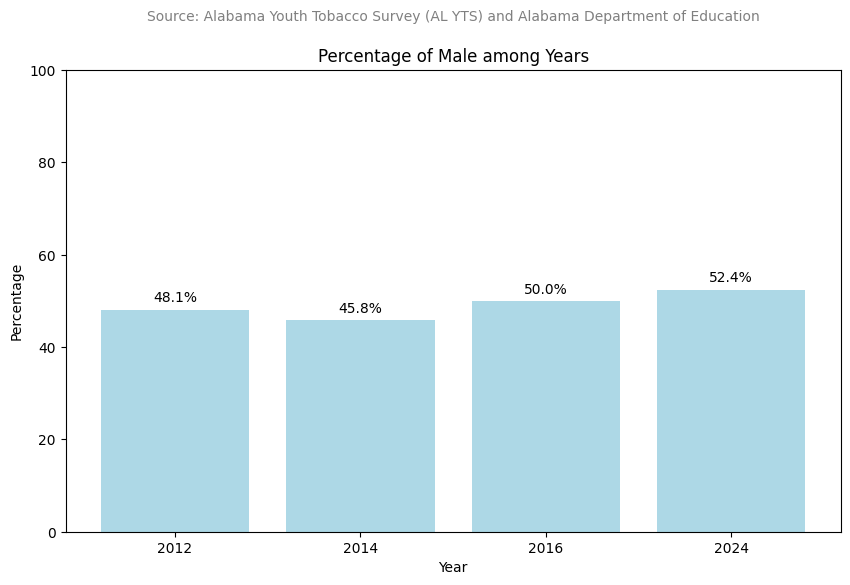

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
years = ['2012', '2014', '2016', '2024']
def calculate_percentages(data_2012, data_2014, data_2016, data_synthetic, gender_value):
    percent_2012 = (data_2012['CR2'] == gender_value).mean() * 100
    percent_2014 = (data_2014['CR2'] == gender_value).mean() * 100
    percent_2016 = (data_2016['CR2'] == gender_value).mean() * 100
    percent_2024 = (data_synthetic['CR2'] == gender_value).mean() * 100
    return [percent_2012, percent_2014, percent_2016, percent_2024]

# get the percentages of male and female
female_percentages = calculate_percentages(data_2012, data_2014, data_2016, synthetic_2024, 1)
male_percentages = calculate_percentages(data_2012, data_2014, data_2016, synthetic_2024, 2)

# Female bar graph
plt.figure(figsize=(10, 6))
bars=plt.bar(years, female_percentages, color='pink')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.title('Percentage of Female among Years')
plt.ylim(0, 100)
plt.text(0.5, 1.1, 'Source: Alabama Youth Tobacco Survey (AL YTS) and Alabama Department of Education',
         ha='center', va='bottom', fontsize=10, color='gray', transform=plt.gca().transAxes)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{yval:.1f}%', ha='center', va='bottom')

plt.show()

# Male bar graph
plt.figure(figsize=(10, 6))
bars=plt.bar(years, male_percentages, color='lightblue')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.title('Percentage of Male among Years')
plt.ylim(0, 100)
plt.text(0.5, 1.1, 'Source: Alabama Youth Tobacco Survey (AL YTS) and Alabama Department of Education',
         ha='center', va='bottom', fontsize=10, color='gray', transform=plt.gca().transAxes)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{yval:.1f}%', ha='center', va='bottom')
plt.show()

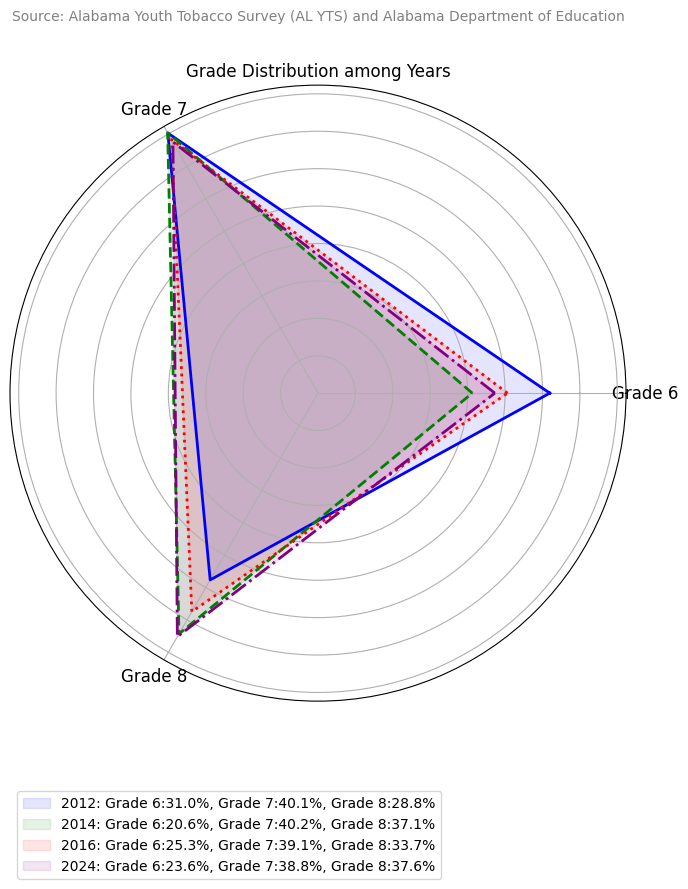

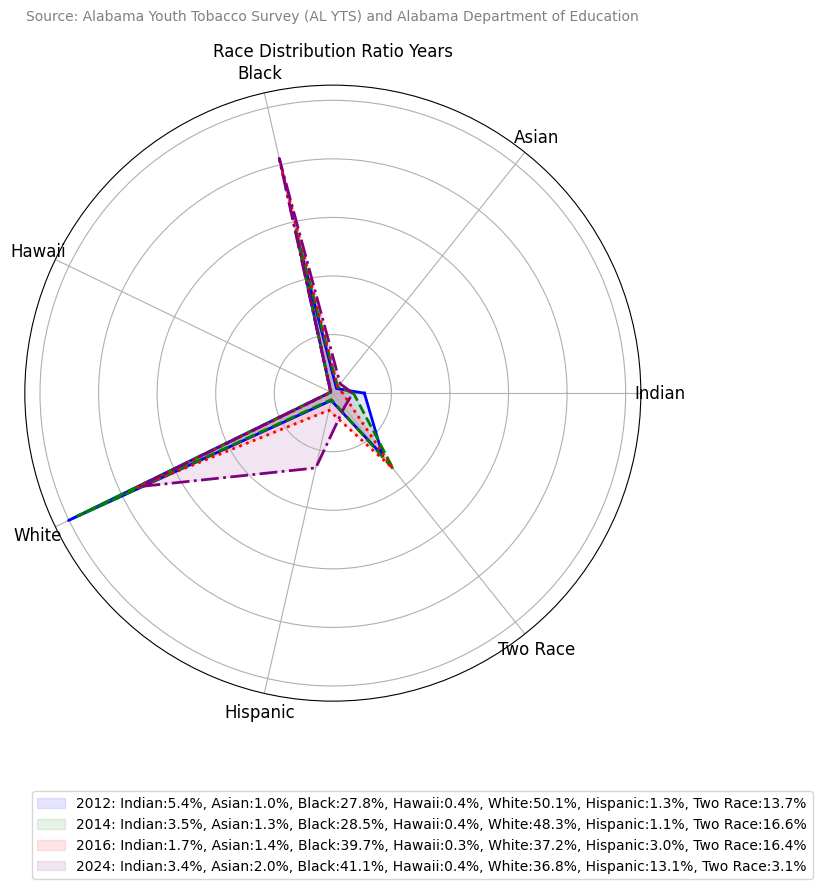

In [ ]:
# Function to plot radar chart with enhanced visibility and showing within-year ratios in legend
def plot_radar_chart_with_enhanced_visibility_and_ratios(df_2012, df_2014, df_2016, df_2024, category, labels, title):
    counts_2012 = df_2012[category].value_counts(normalize=True).reindex(range(1, len(labels) + 1)).fillna(0).values
    counts_2014 = df_2014[category].value_counts(normalize=True).reindex(range(1, len(labels) + 1)).fillna(0).values
    counts_2016 = df_2016[category].value_counts(normalize=True).reindex(range(1, len(labels) + 1)).fillna(0).values
    counts_2024 = df_2024[category].value_counts(normalize=True).reindex(range(1, len(labels) + 1)).fillna(0).values

    angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
    counts_2012 = np.concatenate((counts_2012, [counts_2012[0]]))
    counts_2014 = np.concatenate((counts_2014, [counts_2014[0]]))
    counts_2016 = np.concatenate((counts_2016, [counts_2016[0]]))
    counts_2024 = np.concatenate((counts_2024, [counts_2024[0]]))
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
    ax.fill(angles, counts_2012, color='b', alpha=0.1)
    ax.fill(angles, counts_2014, color='g', alpha=0.1)
    ax.fill(angles, counts_2016, color='r', alpha=0.1)
    ax.fill(angles, counts_2024, color='purple', alpha=0.1)
    ax.plot(angles, counts_2012, color='b', linewidth=2, linestyle='solid', label='2012')
    ax.plot(angles, counts_2014, color='g', linewidth=2, linestyle='dashed', label='2014')
    ax.plot(angles, counts_2016, color='r', linewidth=2, linestyle='dotted', label='2016')
    ax.plot(angles, counts_2024, color='purple', linewidth=2, linestyle='dashdot', label='2024')
    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels, fontsize=12)

    legend_labels = [
        f'2012: ' + ', '.join([f'{label}:{ratio:.1%}' for label, ratio in zip(labels, counts_2012[:-1])]),
        f'2014: ' + ', '.join([f'{label}:{ratio:.1%}' for label, ratio in zip(labels, counts_2014[:-1])]),
        f'2016: ' + ', '.join([f'{label}:{ratio:.1%}' for label, ratio in zip(labels, counts_2016[:-1])]),
        f'2024: ' + ', '.join([f'{label}:{ratio:.1%}' for label, ratio in zip(labels, counts_2024[:-1])])
    ]

    plt.legend(loc='lower left', bbox_to_anchor=(0, -0.3), labels=legend_labels, fontsize=10)
    plt.text(0.5, 1.1, 'Source: Alabama Youth Tobacco Survey (AL YTS) and Alabama Department of Education',
         ha='center', va='bottom', fontsize=10, color='gray', transform=plt.gca().transAxes)
    plt.title(title)
    plt.show()

# Labels for each category
labels_cr3 = ['Grade 6', 'Grade 7', 'Grade 8']

# Plot radar charts for each category with enhanced visibility and ratio in legend
plot_radar_chart_with_enhanced_visibility_and_ratios(data_2012, data_2014, data_2016, synthetic_2024, 'CR3', labels_cr3, 'Grade Distribution among Years')


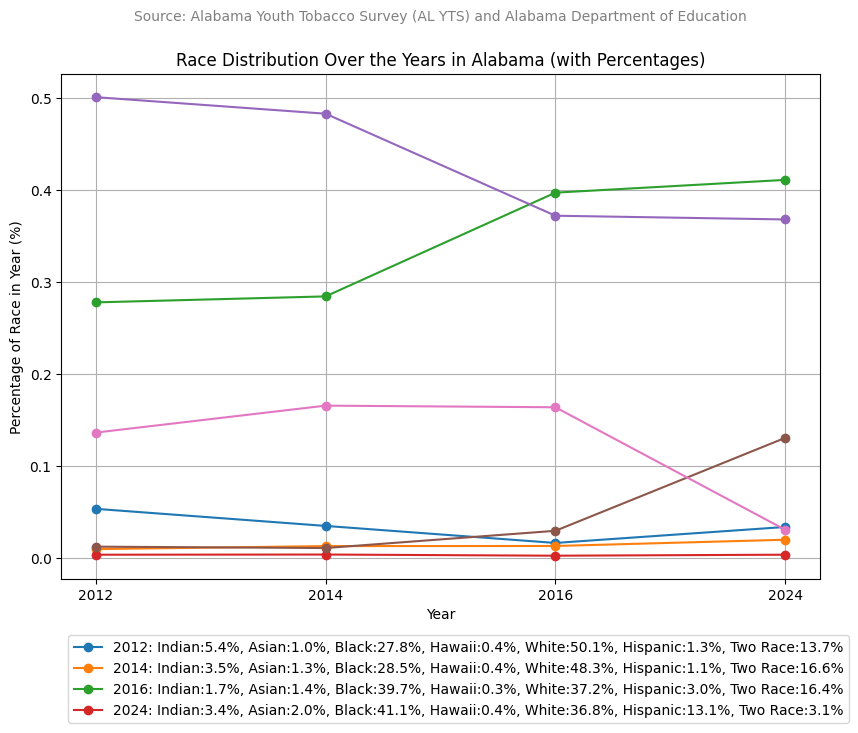

In [ ]:
# Function to plot line chart with enhanced visibility and showing within-year ratios in legend
def plot_line_chart_race_distribution_with_percentages(df_2012, df_2014, df_2016, df_2024, category, labels, title):
    counts_2012 = df_2012[category].value_counts(normalize=True).reindex(range(1, len(labels) + 1)).fillna(0).values
    counts_2014 = df_2014[category].value_counts(normalize=True).reindex(range(1, len(labels) + 1)).fillna(0).values
    counts_2016 = df_2016[category].value_counts(normalize=True).reindex(range(1, len(labels) + 1)).fillna(0).values
    counts_2024 = df_2024[category].value_counts(normalize=True).reindex(range(1, len(labels) + 1)).fillna(0).values
    years = ['2012', '2014', '2016', '2024']
    fig, ax = plt.subplots(figsize=(10, 6))
    legend_labels = [
        f'2012: ' + ', '.join([f'{label}:{ratio:.1%}' for label, ratio in zip(labels, counts_2012[:])]),
        f'2014: ' + ', '.join([f'{label}:{ratio:.1%}' for label, ratio in zip(labels, counts_2014[:])]),
        f'2016: ' + ', '.join([f'{label}:{ratio:.1%}' for label, ratio in zip(labels, counts_2016[:])]),
        f'2024: ' + ', '.join([f'{label}:{ratio:.1%}' for label, ratio in zip(labels, counts_2024[:])])
    ]
    for i, label in enumerate(labels):
        ax.plot(years, [counts_2012[i], counts_2014[i], counts_2016[i], counts_2024[i]],
                marker='o', label=label)

    ax.set_title(title)
    ax.set_ylabel('Percentage of Race in Year (%)')
    ax.set_xlabel('Year')
    ax.legend(title="Race", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
    plt.grid(True)
    plt.tight_layout()
    plt.legend(loc='lower left', bbox_to_anchor=(0, -0.3), labels=legend_labels, fontsize=10)
    plt.text(0.5, 1.1, 'Source: Alabama Youth Tobacco Survey (AL YTS) and Alabama Department of Education',
         ha='center', va='bottom', fontsize=10, color='gray', transform=plt.gca().transAxes)
    plt.show()

# Race labels
labels_cr5 = ['Indian', 'Asian', 'Black', 'Hawaii', 'White', 'Hispanic', 'Two Race']
# Plot the race distribution over years using line chart with percentages
plot_line_chart_race_distribution_with_percentages(data_2012, data_2014, data_2016, synthetic_2024, 'CR5', labels_cr5, 'Race Distribution Over the Years in Alabama (with Percentages)')